### This is an attempt to create a model, using synthetic data, to show how the flow of waste through a pipe can be monitored to predict when it will clog.  We will only use 2 features:

### Our X-axis will be the percentage of the amount of waste that can go through the pipe.  Each pipe will start at 100%, let's imagine that this particular size pipe has a maximum of 50 gallons per minute that can flow through it.  As we more forward in time, let's say 200 days, the pipe may only be at 25 gallons per minute, or 50%.  As a precaution, we'd like to focus on pipes that go under 20% of maximum allowable flow so these can be cleaned before they clog and cause an SSO.

### Our Y-axis, and y-variable, will be the number of days.  We will predict the number of days that will occur before a particular pipe is expected to dip below 20% of its maximum flow.

### Let's first create a few dataframes.  Each will be different sizes to gauge how well the models can predict.

In [53]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Exploring
import scipy.stats as stats

# Modeling
import statsmodels.api as sm

from scipy.stats import pearsonr

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error

In [15]:
pipe_1 = pd.DataFrame(np.random.randint(19,101,size=(100, 1)), columns=['percent_flow'])

In [16]:
pipe_1 = pipe_1.sort_values(by=['percent_flow'], ascending=False)

In [17]:
pipe_1.reset_index(drop=True, inplace=True)

In [18]:
pipe_1.head()

,percent_flow
0,99
1,99
2,99
3,98
4,97


In [19]:
pipe_1.tail()

,percent_flow
95,21
96,21
97,20
98,19
99,19


In [20]:
pipe_1_days = pd.Series(range(1,101))

In [21]:
pipe_1_days = pd.DataFrame(pipe_1_days, columns=['days'])

In [23]:
pipe_1_days.head()

,days
0,1
1,2
2,3
3,4
4,5


In [24]:
pipe_1_days.tail()

,days
95,96
96,97
97,98
98,99
99,100


In [30]:
pipe_1 = pipe_1.merge(pipe_1_days, left_index=True, right_index=True)

In [31]:
pipe_1.head()

,percent_flow,days
0,99,1
1,99,2
2,99,3
3,98,4
4,97,5


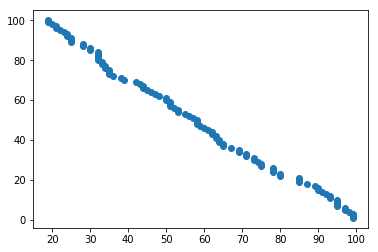

In [32]:
plt.scatter(pipe_1.percent_flow, pipe_1.days)

In [67]:
train = pipe_1[:70]

In [68]:
train.head()

,percent_flow,days
0,99,1
1,99,2
2,99,3
3,98,4
4,97,5


In [69]:
train.tail()

,percent_flow,days
65,44,66
66,44,67
67,43,68
68,42,69
69,39,70


In [70]:
X_train = train[['percent_flow']]
y_train = train[['days']]

In [71]:
test = pipe_1[70:]

In [72]:
test.head()

,percent_flow,days
70,38,71
71,36,72
72,35,73
73,35,74
74,35,75


In [73]:
test.tail()

,percent_flow,days
95,21,96
96,21,97
97,20,98
98,19,99
99,19,100


### Linear Regression

In [74]:
X_test = test[['percent_flow']]
y_test = test[['days']]

In [75]:
lm1 = LinearRegression()
lm1.fit(X_train, y_train)

lm1_y_intercept = lm1.intercept_
print('Y-intercept: ' + str(lm1_y_intercept))

lm1_coefficients = lm1.coef_
print('Coefficients: ' + str(lm1_coefficients))

y_pred_lm1 = lm1.predict(X_train)

Y-intercept: [114.30479724]
Coefficients: [[-1.12601262]]


In [76]:
mse_lm1 = mean_squared_error(y_train, y_pred_lm1)
print("lm1\n  mse: {:.3}".format(mse_lm1)) 

lm1
  mse: 3.26


In [77]:
r2_lm1 = r2_score(y_train, y_pred_lm1)

print('  {:.2%} of the variance in the pipe''s flow can be explained by the increase in number of days.'.format(r2_lm1))

  99.20% of the variance in the pipes flow can be explained by the increase in number of days.


In [78]:
y_pred_test_lm1 = lm1.predict(X_test)
mse_test_lm1 = mean_squared_error(y_test, y_pred_test_lm1)
print("lm1\n  mse: {:.3}".format(mse_test_lm1)) 

lm1
  mse: 18.2


In [79]:
r2_test_lm1 = r2_score(y_test, y_pred_test_lm1)

print('  {:.2%} of the variance in the pipe''s flow can be explained by the increase in number of days.'.format(r2_test_lm1))

  75.76% of the variance in the pipes flow can be explained by the increase in number of days.


### Linear is not so great on the test.  Let's try polynomial 2 degrees after we take a peek at the results.

In [80]:
y_pred_lm1

array([[ 2.82954824],
       [ 2.82954824],
       [ 2.82954824],
       [ 3.95556085],
       [ 5.08157347],
       [ 5.08157347],
       [ 7.3335987 ],
       [ 7.3335987 ],
       [ 7.3335987 ],
       [ 7.3335987 ],
       [ 9.58562393],
       [ 9.58562393],
       [10.71163655],
       [11.83764917],
       [12.96366178],
       [12.96366178],
       [14.0896744 ],
       [16.34169963],
       [18.59372486],
       [18.59372486],
       [18.59372486],
       [24.22378794],
       [24.22378794],
       [26.47581318],
       [26.47581318],
       [26.47581318],
       [29.85385102],
       [29.85385102],
       [30.97986364],
       [32.10587626],
       [32.10587626],
       [34.35790149],
       [34.35790149],
       [36.60992672],
       [36.60992672],
       [38.86195195],
       [41.11397719],
       [41.11397719],
       [42.2399898 ],
       [42.2399898 ],
       [43.36600242],
       [43.36600242],
       [44.49201504],
       [44.49201504],
       [45.61802765],
       [46

In [81]:
y_pred_test_lm1

array([[71.51631782],
       [73.76834306],
       [74.89435567],
       [74.89435567],
       [74.89435567],
       [76.02036829],
       [76.02036829],
       [77.14638091],
       [77.14638091],
       [78.27239352],
       [78.27239352],
       [78.27239352],
       [78.27239352],
       [78.27239352],
       [80.52441875],
       [80.52441875],
       [82.77644399],
       [82.77644399],
       [86.15448184],
       [86.15448184],
       [86.15448184],
       [87.28049445],
       [87.28049445],
       [88.40650707],
       [89.53251968],
       [90.6585323 ],
       [90.6585323 ],
       [91.78454492],
       [92.91055753],
       [92.91055753]])

### Polynomial

In [82]:
poly_features = PolynomialFeatures(degree=2)

In [83]:
### transforms the existing features to higher degree features.
X_train_poly = poly_features.fit_transform(X_train)

### fit the transformed features to Linear Regression
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
    
### predicting on training data-set
y_train_predicted = poly_model.predict(X_train_poly)

In [84]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_predicted))
r2_train = r2_score(y_train, y_train_predicted)

In [85]:
print("The model performance for the training set")
print("-------------------------------------------")
print("RMSE of training set is {}".format(rmse_train))
print("R2 score of training set is {}".format(r2_train))

The model performance for the training set
-------------------------------------------
RMSE of training set is 1.456526147727696
R2 score of training set is 0.994803506628256


In [86]:
y_test_predicted = poly_model.predict(poly_features.fit_transform(X_test))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_predicted))
r2_test = r2_score(y_test, y_test_predicted)
print("The model performance for the test set")
print("-------------------------------------------")
print("RMSE of test set is {}".format(rmse_test))
print("R2 score of test set is {}".format(r2_test))

The model performance for the test set
-------------------------------------------
RMSE of test set is 3.0248283349188467
R2 score of test set is 0.8778698137166462


In [87]:
y_test_predicted

array([[ 74.56840107],
       [ 77.35502125],
       [ 78.76005774],
       [ 78.76005774],
       [ 78.76005774],
       [ 80.17291183],
       [ 80.17291183],
       [ 81.59358353],
       [ 81.59358353],
       [ 83.02207282],
       [ 83.02207282],
       [ 83.02207282],
       [ 83.02207282],
       [ 83.02207282],
       [ 85.90250423],
       [ 85.90250423],
       [ 88.81420604],
       [ 88.81420604],
       [ 93.24039078],
       [ 93.24039078],
       [ 93.24039078],
       [ 94.7314209 ],
       [ 94.7314209 ],
       [ 96.23026862],
       [ 97.73693395],
       [ 99.25141687],
       [ 99.25141687],
       [100.7737174 ],
       [102.30383553],
       [102.30383553]])

In [ ]:
pipe_1_days = pd.DataFrame(pipe_1_days, columns=['days'])

In [91]:
y_test_predicted = pd.DataFrame(y_test_predicted, columns=['days'])

In [96]:
X_test.reset_index(drop=True, inplace=True)

In [97]:
pipe_1_results = X_test.merge(y_test_predicted, left_index=True, right_index=True)

In [98]:
pipe_1_results

,percent_flow,days
0,38,74.568401
1,36,77.355021
2,35,78.760058
3,35,78.760058
4,35,78.760058
5,34,80.172912
6,34,80.172912
7,33,81.593584
8,33,81.593584
9,32,83.022073
